In [2]:
# imports 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

# Part1

In [3]:
# loding data
url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
df = pd.read_csv(url)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [4]:
# Filter the 4 largest cities into a new dataframe. the 4 largest cities would have rank values of [0,1,2,3]
new_df = df.loc[df['SizeRank'] < 4]
new_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [5]:
# Melt the data to long-form and prepare it for time series analysis
melted = pd.melt(new_df, id_vars = ['RegionID',	'SizeRank',	'RegionName',	'RegionType',	'StateName',	'State',	'Metro',	'CountyName'],
                 value_name='HomeValue', var_name ='Date')
melted               

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,HomeValue
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [6]:
# Convert the melted dates into datetime datatype.
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   HomeValue   1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


In [7]:
# Make the datetime column the index.
melted = melted.set_index('Date')
melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,HomeValue
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0


In [8]:
melted['RegionType'].value_counts()

city    1092
Name: RegionType, dtype: int64

In [9]:
melted['RegionName'].value_counts()

New York       273
Los Angeles    273
Houston        273
Chicago        273
Name: RegionName, dtype: int64

In [10]:
# Resample the dataframe as monthly frequency, grouped by City
df_ts = melted.groupby('RegionName').resample("M").sum()
df_ts

C:\Users\user\AppData\Local\Temp\ipykernel_6440\3284274389.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("M").sum()
C:\Users\user\AppData\Local\Temp\ipykernel_6440\3284274389.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("M").sum()
C:\Users\user\AppData\Local\Temp\ipykernel_6440\3284274389.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be val

RegionID  SizeRank  HomeValue
RegionName Date                                     
Chicago    2000-01-31     17426         3   166139.0
           2000-02-29     17426         3   166536.0
           2000-03-31     17426         3   167368.0
           2000-04-30     17426         3   168826.0
           2000-05-31     17426         3   170499.0
...                         ...       ...        ...
New York   2022-05-31      6181         0   768797.0
           2022-06-30      6181         0   773944.0
           2022-07-31      6181         0   777692.0
           2022-08-31      6181         0   779960.0
           2022-09-30      6181         0   781622.0

[1092 rows x 3 columns]

In [11]:
df_ts.index

MultiIndex([( 'Chicago', '2000-01-31'),
            ( 'Chicago', '2000-02-29'),
            ( 'Chicago', '2000-03-31'),
            ( 'Chicago', '2000-04-30'),
            ( 'Chicago', '2000-05-31'),
            ( 'Chicago', '2000-06-30'),
            ( 'Chicago', '2000-07-31'),
            ( 'Chicago', '2000-08-31'),
            ( 'Chicago', '2000-09-30'),
            ( 'Chicago', '2000-10-31'),
            ...
            ('New York', '2021-12-31'),
            ('New York', '2022-01-31'),
            ('New York', '2022-02-28'),
            ('New York', '2022-03-31'),
            ('New York', '2022-04-30'),
            ('New York', '2022-05-31'),
            ('New York', '2022-06-30'),
            ('New York', '2022-07-31'),
            ('New York', '2022-08-31'),
            ('New York', '2022-09-30')],
           names=['RegionName', 'Date'], length=1092)

# Part2

In [12]:
# slice Home Value column 
df_plot = df_ts[['HomeValue']]
df_plot

HomeValue
RegionName Date                 
Chicago    2000-01-31   166139.0
           2000-02-29   166536.0
           2000-03-31   167368.0
           2000-04-30   168826.0
           2000-05-31   170499.0
...                          ...
New York   2022-05-31   768797.0
           2022-06-30   773944.0
           2022-07-31   777692.0
           2022-08-31   779960.0
           2022-09-30   781622.0

[1092 rows x 1 columns]

In [13]:
unstacked = df_plot.unstack(level=0)
unstacked

HomeValue                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [14]:
#  create a function to use thousands of dollars with a "K" at the end
def thousands(x,pos):
    new_x = x/1_000
    return f"{new_x:,.0f}K"

# Create the formatter
fmt_thous = mticks.FuncFormatter(thousands)

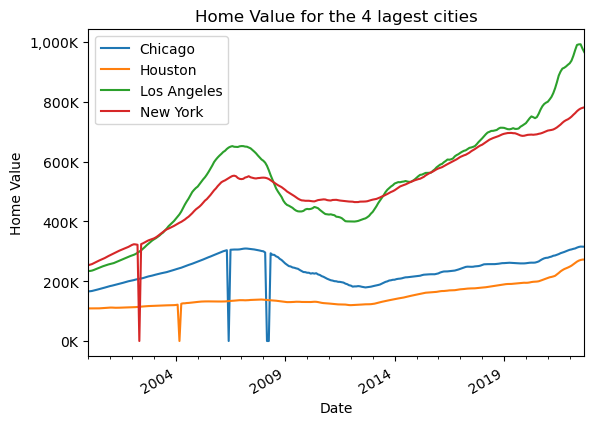

In [15]:
# Plot the home values for all 4 cities. 
fig, ax = plt.subplots()
unstacked['HomeValue'].plot(ax=ax)

# add title & y-axis label
ax.set(title = 'Home Value for the 4 lagest cities', ylabel ='Home Value')

# format the y-axis ticks 
ax.yaxis.set_major_formatter(fmt_thous)

# add legend
ax.legend()
fig.autofmt_xdate()

1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [16]:
hv_2008 = df_plot.loc[pd.IndexSlice[:,'2008-12'], :]
hv_2008

,,HomeValue
RegionName,Date,
Chicago,2008-12-31,265306.0
Houston,2008-12-31,131283.0
Los Angeles,2008-12-31,469294.0
New York,2008-12-31,510309.0


In [17]:
# determine the city that have the highest home value 
hv_208_max = hv_2008.idxmax()
hv_208_max

HomeValue    (New York, 2008-12-31 00:00:00)
dtype: object

In [18]:
# determine the city that have the lowest home value 
hv_208_min = hv_2008.idxmin()
hv_208_min

HomeValue    (Houston, 2008-12-31 00:00:00)
dtype: object

2) How much did the home values change from November 2008 to December 2008 (in dollars)?

In [70]:
hv_change = unstacked.diff()
hv_change

HomeValue                             
RegionName   Chicago Houston Los Angeles New York
Date                                             
2000-01-31       NaN     NaN         NaN      NaN
2000-02-29     397.0    11.0       220.0   1827.0
2000-03-31     832.0  -201.0      1112.0   1690.0
2000-04-30    1458.0     3.0      2076.0   3103.0
2000-05-31    1673.0   -47.0      2524.0   2894.0
...              ...     ...         ...      ...
2022-05-31    2838.0  4457.0     17223.0   6476.0
2022-06-30    2176.0  3343.0      1946.0   5147.0
2022-07-31    1247.0  2158.0       293.0   3748.0
2022-08-31    -323.0  1341.0    -14434.0   2268.0
2022-09-30    -158.0   239.0    -11601.0   1662.0

[273 rows x 4 columns]

In [71]:
#  use df.columns.droplevel() with an index 0 to drop HomeValue index
hv_change.columns = hv_change.columns.droplevel(0)
hv_change

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,NaN,NaN,NaN,NaN
2000-02-29,397.0,11.0,220.0,1827.0
2000-03-31,832.0,-201.0,1112.0,1690.0
2000-04-30,1458.0,3.0,2076.0,3103.0
2000-05-31,1673.0,-47.0,2524.0,2894.0
...,...,...,...,...
2022-05-31,2838.0,4457.0,17223.0,6476.0
2022-06-30,2176.0,3343.0,1946.0,5147.0
2022-07-31,1247.0,2158.0,293.0,3748.0


In [72]:
# Extract the change for December 2008
change_dec_2008 = hv_change.loc['2008-12']
for name in d.columns :
    value_change = change_dec_2008[name].item()
    print(f"from November 2008 to December 2008, home values change was {value_change}$ for {name}")

from November 2008 to December 2008, home values change was -5753.0$ for Chicago
from November 2008 to December 2008, home values change was -964.0$ for Houston
from November 2008 to December 2008, home values change was -12611.0$ for Los Angeles
from November 2008 to December 2008, home values change was -4458.0$ for New York
